In [ ]:
#load modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
#load dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
#data preprocessing
#load features and target
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [6]:
#convert categorical data to numeric
df['embarked'] = df['embarked'].map({'C': 1, 'S': 2, 'Q': 3})
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [8]:
#create features and target
X = df.drop('survived', axis=1)
y = df['survived']

In [9]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [10]:
#initialize the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = rf_model.predict(X_test)
print(y_pred)

[1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1]


In [12]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7692307692307693

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        80
           1       0.76      0.70      0.73        63

    accuracy                           0.77       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143



Text(0.5, 1.0, 'Confusion Matrix')

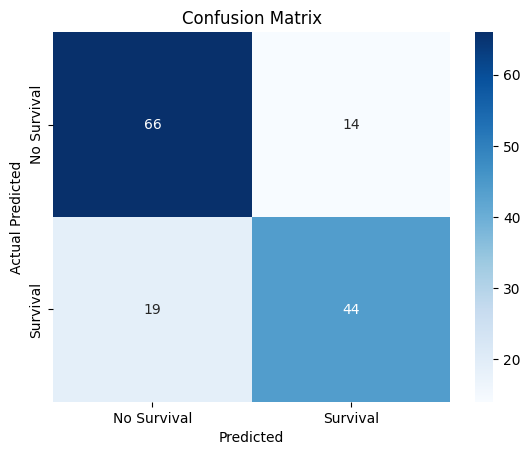

In [13]:
#confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm, annot=True, 
    cmap='Blues', fmt='d', 
    xticklabels=['No Survival', 'Survival'], 
    yticklabels=['No Survival', 'Survival']
)
plt.xlabel('Predicted')
plt.ylabel('Actual Predicted')
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Most Features Used')

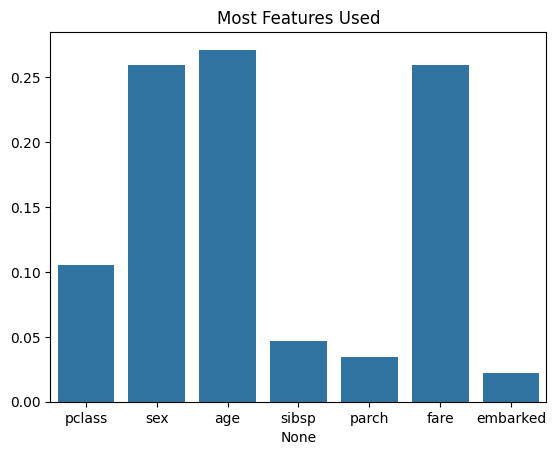

In [14]:
#barplot for feature importance
importance = rf_model.feature_importances_
feature_names = X.columns

sns.barplot(x=feature_names, y=importance)
plt.title('Most Features Used')